In [ ]:
from my_ai_utils import *

Model : 'sequential' 
________________________________________________________

Layer (type)			 Params #

dense (Dense)			10

dense_1 (Dense)			3


Total params: 13


Training data dimensions:  (799, 4)
Epoch 1/10


100%|██████████| 25/25 [00:00<00:00, 2777.98it/s, train_loss=0.961, val_loss=1.03]


Epoch 2/10


100%|██████████| 25/25 [00:00<00:00, 2774.01it/s, train_loss=0.684, val_loss=0.714]


Epoch 3/10


100%|██████████| 25/25 [00:00<00:00, 4166.31it/s, train_loss=0.522, val_loss=0.512]


Epoch 4/10


100%|██████████| 25/25 [00:00<00:00, 2780.12it/s, train_loss=0.473, val_loss=0.447]


Epoch 5/10


100%|██████████| 25/25 [00:00<00:00, 3571.44it/s, train_loss=0.457, val_loss=0.418]


Epoch 6/10


100%|██████████| 25/25 [00:00<00:00, 4166.80it/s, train_loss=0.45, val_loss=0.423]


Epoch 7/10


100%|██████████| 25/25 [00:00<00:00, 3574.12it/s, train_loss=0.445, val_loss=0.404]


Epoch 8/10


100%|██████████| 25/25 [00:00<00:00, 5005.37it/s, train_loss=0.443, val_loss=0.409]


Epoch 9/10


100%|██████████| 25/25 [00:00<00:00, 2777.76it/s, train_loss=0.441, val_loss=0.416]


Epoch 10/10


100%|██████████| 25/25 [00:00<00:00, 3123.74it/s, train_loss=0.44, val_loss=0.408]


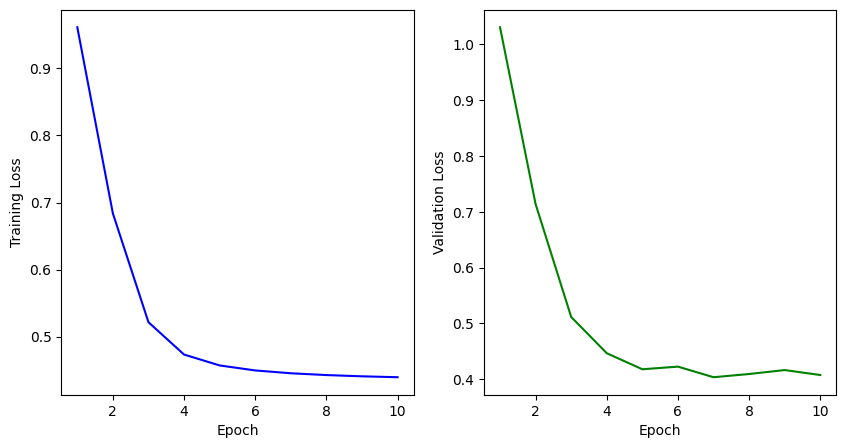

In [3]:
#==== Test 2 : Simple regression =====#
np.random.seed(42)
n = 1000
m = 4
X = np.random.rand(n, m)
#Y = 2*X + np.random.randn(n, 1)
Y = np.reshape(2*X[:,0], (n, 1)) + np.random.randn(n, 1)*0.1

a = NeuralNet(usage=Usage.regression)
a.add_layer(Dense(in_features=m, out_features=2, activation="sigmoid"))
a.add_layer(Dense(in_features=2, out_features=1, activation="sigmoid"))
a.compile(loss_fn=Loss("l2"), optimizer=Momentum(0.9, lr=0.01), dropout=0.2)
a.summary()

a.train(X, Y, nepochs=10, batch_size=32)
# Momentum(0.9, lr=0.01) - Adagrad(lr=0.01) - RMSprop(0.6, lr=0.01) - Adam(0.9, 0.999, lr=0.01)